In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from wand.image import Image
from wand.display import display


## Operations on Signals

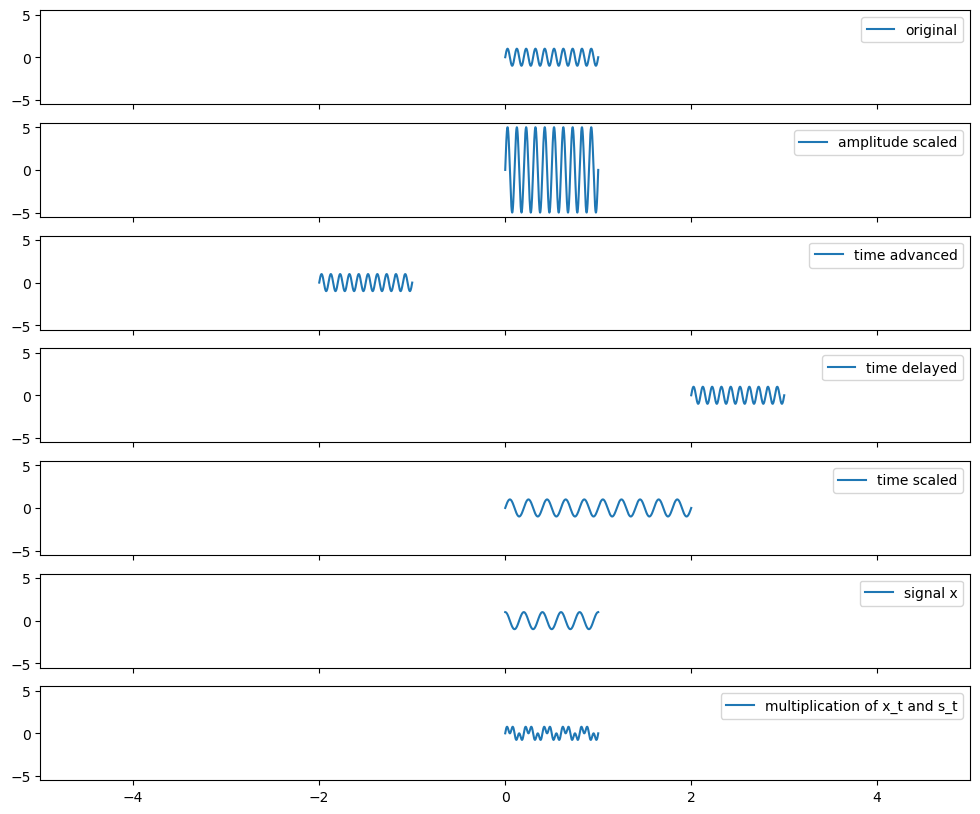

In [4]:
freq = 10
srate = 500

t = np.linspace(0, 1, srate)

s_t = np.sin(2*np.pi*freq*t)

x_t = np.cos(2*np.pi*5*t)

amplitude = 5

fig, ax = plt.subplots(7, 1, sharey=True, sharex=True, figsize=(12,10))

ax[0].set(xlim=(-5, 5))
ax[0].plot(t, s_t, label='original')
ax[1].plot(t, amplitude*s_t, label='amplitude scaled')
ax[2].plot(t-2, s_t, label='time advanced')
ax[3].plot(t+2, s_t, label='time delayed')
ax[4].plot(t*2, s_t, label='time scaled')

ax[5].plot(t, x_t, label='signal x')
ax[6].plot(t, x_t*s_t, label='multiplication of x_t and s_t')





for axes in ax:
    axes.legend()

## Simulating simple signals

In [10]:
srate = 1000 # define sampling rate (signal length = 1s)
freqs = [1, 2, 10, 25, 30] # define a list of frequencies
amps = [1, 15, 10, 5,  10] # define their amplitudes
phases = [np.pi/7, np.pi/8, np.pi, np.pi/2, -np.pi/4]

In [11]:
t = np.linspace(0, 1, 1000, False)  # 1 second

signals = []

for idx in range(len(freqs)):
    print(idx)
    sine = amps[idx] * np.sin(2*np.pi* freqs[idx]* t + phases[idx])
    signals.append(sine)
    print(len(sine))

print("Nr. of signals:", len(signals))

0
1000
1
1000
2
1000
3
1000
4
1000
Nr. of signals: 5


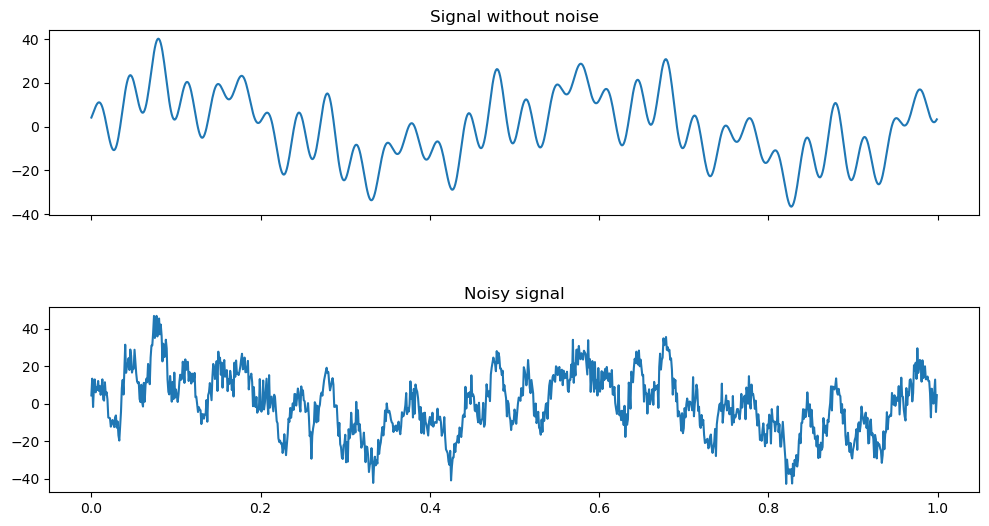

In [12]:
noise = np.random.normal(0,5.0,1000)
#noise = np.random.randn(1000)                 # white noise 1

signal_final = sum(signals)
signal_noisy = signal_final + noise

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,6))
ax[0].plot(t, signal_final)
plt.subplots_adjust(hspace=0.5)
ax[0].set_title('Signal without noise')
ax[1].set_title('Noisy signal')
ax[1].plot(t, signal_noisy);

In [36]:
def createSignal(freqList, lenSignal, timePeriod, burstFreq, burstTime):
    
    t = np.linspace(timePeriod[0], timePeriod[1], lenSignal)
    
    signal =  np.sin(np.pi * 2. * burstFreq * t)     # sin(2 pi f t)
    
    signal[np.logical_or(t < burstTime[0], t > burstTime[1])] = 0
    
    on_time = np.logical_and(t >= burstTime[0], t <= burstTime[1])
    
    signal[on_time] *= np.hanning(on_time.sum()) 
    
    for f in freqList:
        signal = signal + np.sin(2*np.pi*f*t)
        
    return signal


def getFT(signal):
    ft = np.fft.fft(signal)/len(signal)
    return 2*np.abs(ft)

In [19]:
x_ft.shape

(1024,)

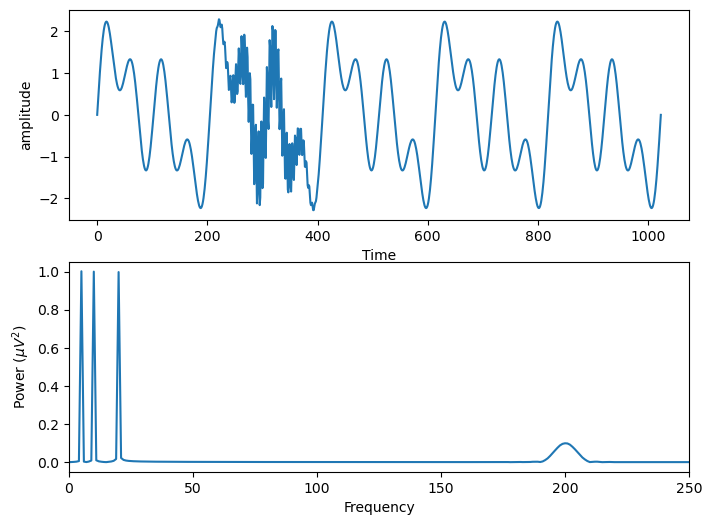

In [38]:
%matplotlib inline
freqList = [ 10, 20, 5]
N = 1024
timePeriod = [0,1]

burstFreq = 200
burstTime = [0.2, 0.4]

x = createSignal(freqList, N, timePeriod, burstFreq,burstTime)
x_ft = getFT(x)

fig, axes = plt.subplots(2, 1, figsize=(8,6))
axes[0].plot(range(N), x)
axes[0].set(xlabel='Time', ylabel='amplitude')
axes[1].plot(x_ft)
axes[1].set(xlabel='Frequency', xlim=(0, 250), ylabel=r'Power ($\mu V^2$)');


<IPython.core.display.Javascript object>


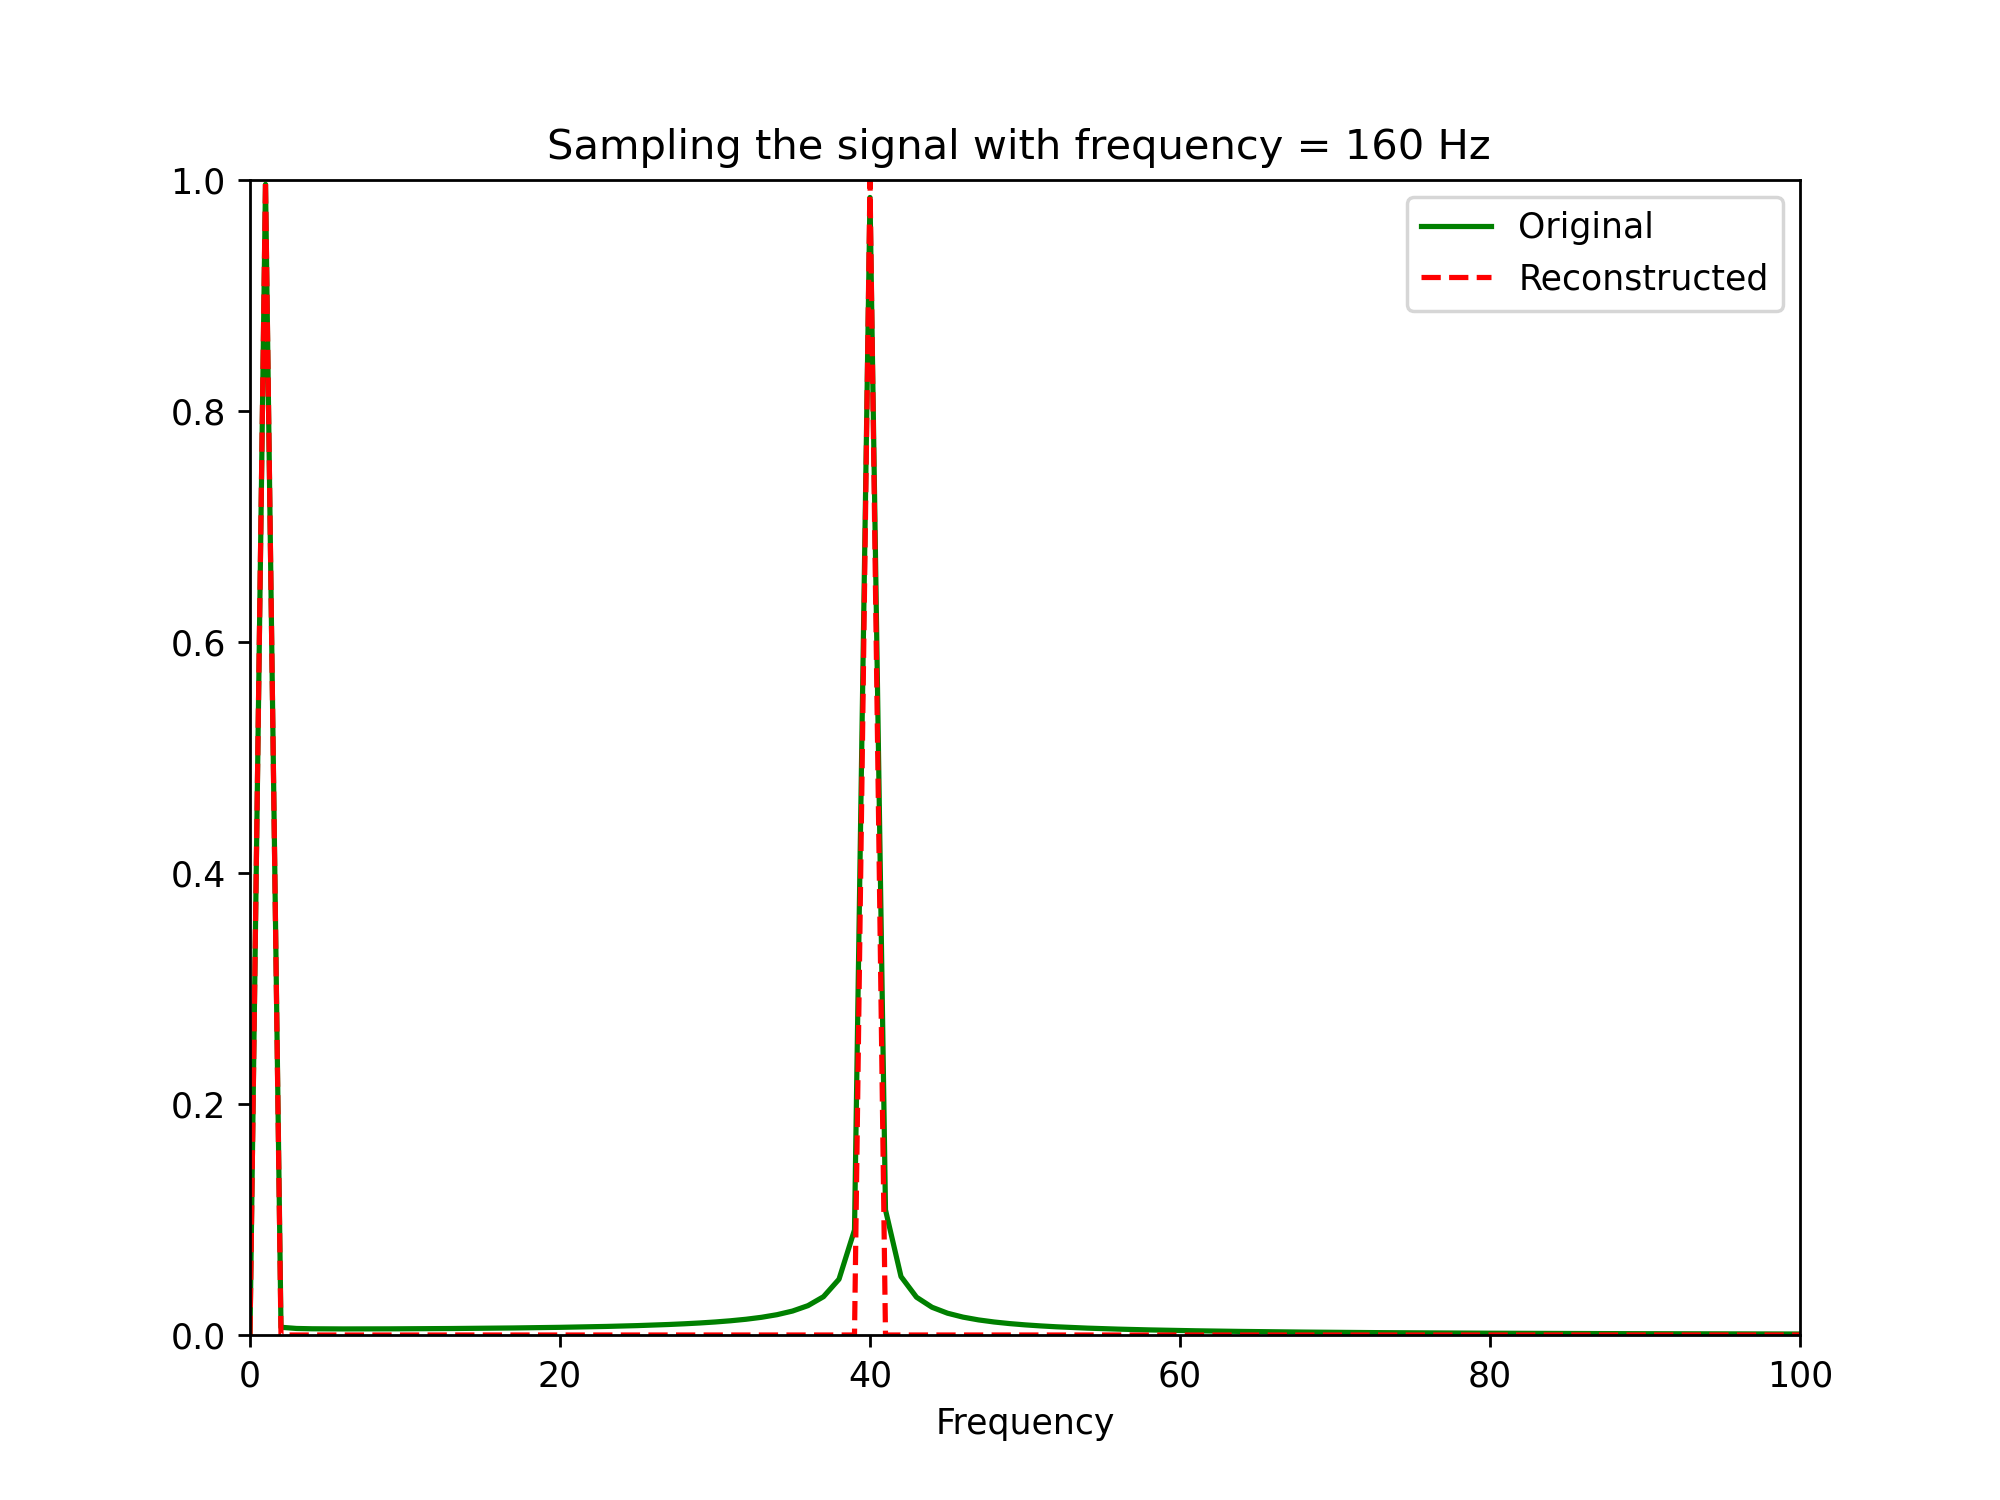

In [30]:
%matplotlib notebook
def clt(current):
    # if animation is at the last frame, stop it
    current = current+10
    plt.cla()
    if current == 160: 
        a.event_source.stop()
    # sampling a signal badlimited to 40 Hz 
    # with a sampling rate of 800 Hz
    f = 40;  # Hz
    tmin = -0.5;
    tmax = 0.5;
    t = np.linspace(tmin, tmax, 400);
    x = np.cos(2*np.pi*t) + np.cos(2*np.pi*f*t); # signal 
    ft_x = getFT(x)
    plt.plot(ft_x, 'g', label='Original')   
    
    # sampling the signal with a sampling rate of 0.5 of signal frequency
    # in this case, we are using the Nyquist rate.
    T = 1/80;
    nmin = np.ceil(tmin / T);
    nmax = np.floor(tmax / T);
    n = np.arange(nmin,nmax);
    x1 =  np.cos(2*np.pi*n*T) + np.cos(2*np.pi*f*n*T);
#     plt.plot(n*T, x1, '-b', label='Inline label')
    # sampling the signal with a sampling rate of 35 Hz
    # note that 35 Hz is under the Nyquist rate.
    T = 1/current;
    nmin = np.ceil(tmin / T);
    nmax = np.floor(tmax / T);
    n = np.arange(nmin,nmax);
    x2 = np.cos(2*np.pi*n*T) + np.cos(2*np.pi*f*n*T);
    ft_x2 = getFT(x2)
    plt.plot(ft_x2, '--r', label='Reconstructed')
    
    plt.axis([0, 100, 0, 1])
    plt.gca().set_title('Sampling the signal with frequency = {} Hz '.format(current))
    plt.gca().set_xlabel('Frequency')
    plt.legend()
    
fig = plt.figure(figsize=(8, 6))
a = animation.FuncAnimation(fig, clt, interval=1000)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=0.8, metadata=dict(artist='Ashima Keshava'), bitrate=1800, )

# a.save('reconstruction.mp4', writer=writer, savefig_kwargs={'bbox_layout':'tight'})

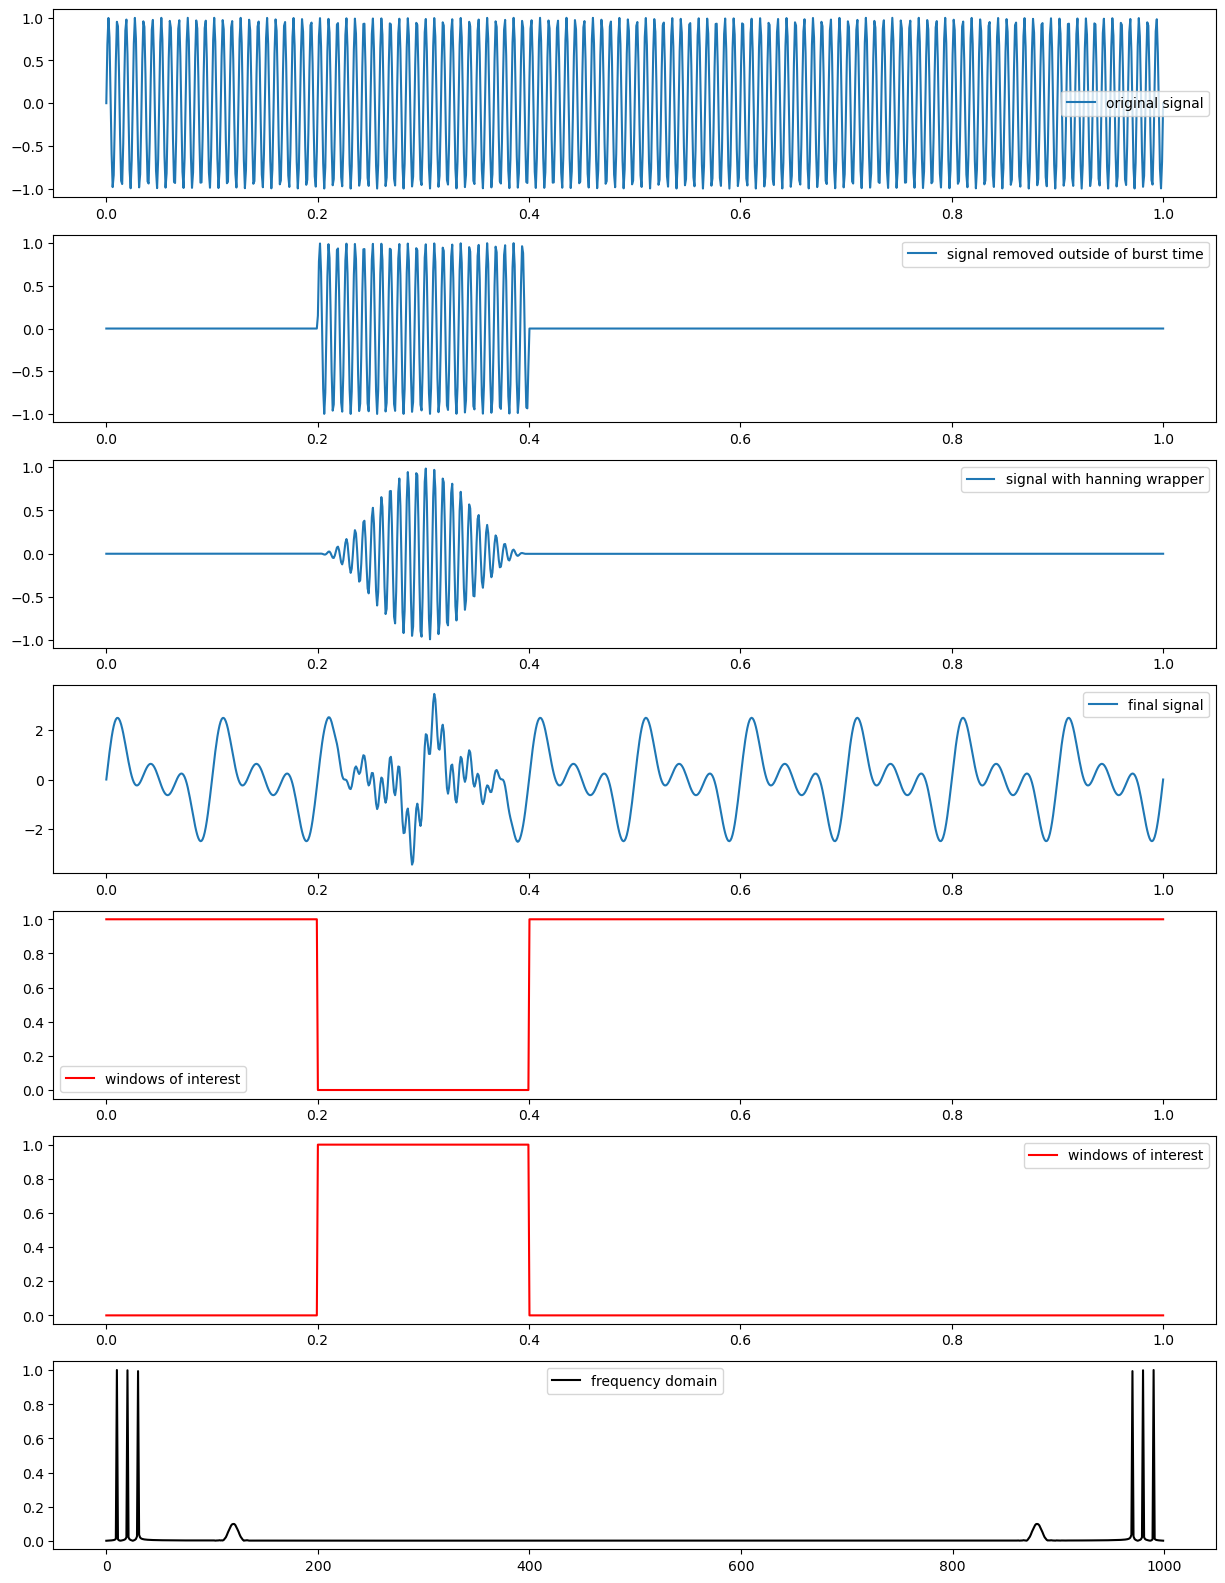

In [39]:
%matplotlib inline

fig, ax = plt.subplots(7, 1, figsize=(15, 20), sharex=False)
t = np.linspace(0, 1, 1000)

signal =  np.sin(np.pi * 2. * 120 * t)     # sin(2 pi f t)

ax[0].plot(t, signal, label = 'original signal',)

signal[np.logical_or(t < 0.2, t > 0.4)] = 0

ax[1].plot(t, signal, label = 'signal removed outside of burst time',)

on_time = np.logical_and(t >= 0.2, t <= 0.4)

signal[on_time] *= np.hanning(on_time.sum()) 

ax[2].plot(t, signal, label = 'signal with hanning wrapper',)

for f in [10, 20, 30]:
    signal = signal + np.sin(2*np.pi*f*t)

ax[3].plot(t, signal, label = 'final signal',)

ax[4].plot(t, np.logical_or(t < 0.2, t > 0.4), color='r', label='windows of interest')

ax[5].plot(t, on_time, color='r', label='windows of interest')

ax[6].plot(getFT(signal), label='frequency domain', color='k')

for a in ax:
    a.legend()